# Gaussian Mixtures
- A probabilistic approach to clustering
- Infer the parameters of $k$ **components**
- For example, a mixture of two Gaussians ($k\!=\!2$)
    - **Parameters** $\boldsymbol{\theta}$ are $(\pi_1, \mu_1,\Sigma_1),\ (\pi_2, \mu_2,\Sigma_2)$ where $\pi_1\!+\!\pi_2\!=\!1$ plus the latent cluster assignment variables  

np.float64(0.9999186170237142)

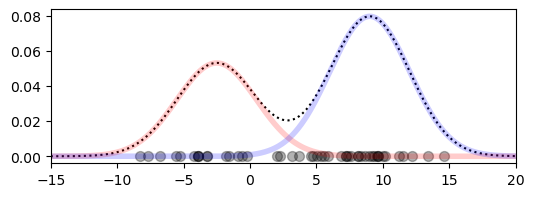

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import norm

# mixing coeffs and same sigma for both
p0, p1, std = 0.4, 0.6, 3

np.random.seed(42) # just some quick points to plot - not proper sampling from the mixture!
X,c,ctr = datasets.make_blobs(n_features=1,cluster_std=std,n_samples=[18,30],return_centers=True)

x = np.linspace(-15, 20, 1000)
g = norm(ctr,std).pdf(x)
pdf = p0 * g[0] + p1 * g[1]

plt.figure(figsize=(6,2))
plt.plot(x, pdf, 'k:')
plt.scatter(X, np.zeros(X.shape[0]), c='k', s=50, alpha=0.3) #, cmap=plt.cm.RdBu)
plt.xlim(x[0], x[-1])

if c is not None:
    plt.plot(x, p0 * g[0], 'r', lw=4, alpha=0.2)
    plt.plot(x, p1 * g[1], 'b', lw=4, alpha=0.2)

np.trapezoid(pdf, x)

## GMM with $k=2$
- Difficult because of the unknown cluster memberships 
- Latent variables $z_{ki}$ represent the event that $x_i$ belongs to component $k$ i-th $P(z_{ki}|x_i)$ probability
- Likelihood function $\displaystyle L(\boldsymbol{\theta};\boldsymbol{x}) = \prod_{i=1}^n \Big[\pi_1\, G\left(x_i;\mu_1,\Sigma_1\right) + \pi_2 \, G\left(x_i; \mu_2,\Sigma_2\right)\Big]$

## Expectation-Maximization Algorithm
- The EM algorithm is a general framework
    - Create an initial model $\theta$
    - Find a better $\theta'$ s.t. the likelihood or posterior improves: $p(D\mid\theta') > p(D\mid\theta)$ 
    - Repeat until convergence

### E-step
- Estimate the membership (probabilities) for each data point $x$
- Based on the current mixture model $(\pi_1, \pi_2, \mu_1,\mu_2,\Sigma_1,\Sigma_2)$ 

### M-step
- Maximize the likelihood function based on the estimated memberships (and their probabilities), obtain better $(\pi_1, \pi_2, \mu_1,\mu_2,\Sigma_1,\Sigma_2)$ estimates
- In spirit, this is not completely unlike $k$-means clustering algorithm

### Iris Example

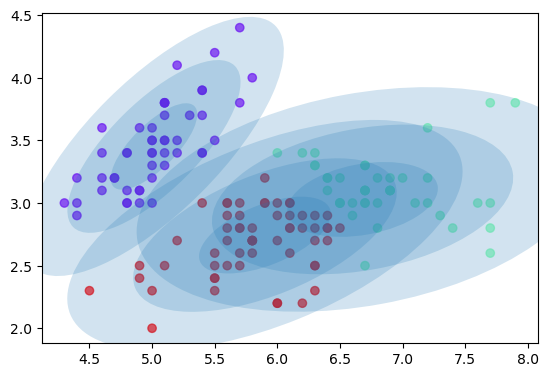

In [2]:
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from matplotlib.patches import Ellipse

iris = datasets.load_iris()
X = iris.data[:,:2] # only 2 features

gmm = GaussianMixture(n_components=3)
gmm.fit(X)
Cpred = gmm.predict(X)

ax = plt.subplot(1, 1, 1, aspect='equal')
plt.scatter(X[:,0], X[:,1], c=Cpred, cmap=plt.cm.rainbow, alpha=0.7)

for n in np.arange(gmm.n_components): 
    cov = gmm.covariances_[n]
    v, w = np.linalg.eigh(cov)
    angle = 180/np.pi * np.arctan2(w[0,1],w[0,0])
    for i in range(1,4): # of contours
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n], a[0],a[1], angle=angle)
        ell.set_alpha(0.2)
        ax.add_artist(ell)

In [3]:
gmm.weights_

array([0.32444572, 0.29474143, 0.38081285])

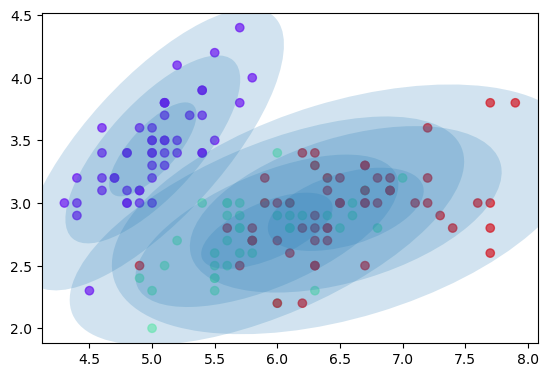

In [4]:
# cluster on all features w/ plotting another projection
X = iris.data[:,:] 

gmm = GaussianMixture(n_components=3)
gmm.fit(X)
Cpred = gmm.predict(X)

ax = plt.subplot(111, aspect='equal')
if False: # if coloring by the true class memberships
    plt.scatter(X[:,0], X[:,1], c=iris.target, cmap=plt.cm.rainbow, alpha=0.7) 
else:
    plt.scatter(X[:,0], X[:,1], c=Cpred, cmap=plt.cm.rainbow, alpha=0.7) 
    
for n in np.arange(gmm.n_components): 
    cov = gmm.covariances_[n][:2,:2] 
    v, w = np.linalg.eigh(cov)
    angle = 180/np.pi * np.arctan2(w[0,1],w[0,0])
    for i in range(1,4): # of contours
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,:2], a[0],a[1], angle=angle)
        ell.set_alpha(0.2)
        ax.add_artist(ell)

In [5]:
Cpred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
gmm.covariances_[0].shape

(4, 4)

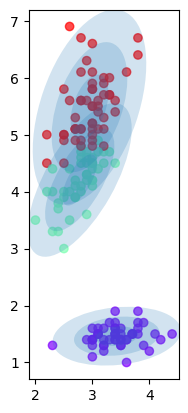

In [7]:
# plot another projections of the 4-D space
ax = plt.subplot(111, aspect='equal')
if False: # coloring by the true class memberships
    plt.scatter(X[:,1], X[:,2], c=iris.target, cmap=plt.cm.rainbow, alpha=0.7) 
else:
    plt.scatter(X[:,1], X[:,2], c=Cpred, cmap=plt.cm.rainbow, alpha=0.7) 
    
for n in np.arange(gmm.n_components): 
    cov = gmm.covariances_[n][1:3,1:3] 
    v, w = np.linalg.eigh(cov)
    angle = 180/np.pi * np.arctan2(w[0,1],w[0,0])
    for i in range(1,4): # of contours
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,1:3], a[0],a[1], angle=angle)
        ell.set_alpha(0.2)
        ax.add_artist(ell)

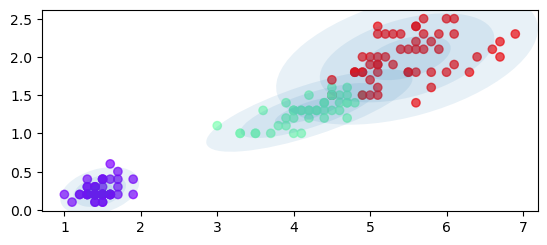

In [8]:
# plot another projections of the 4-D space
ax = plt.subplot(111, aspect='equal')
if False: # coloring by the true class memberships
    plt.scatter(X[:,2], X[:,3], c=iris.target, cmap=plt.cm.rainbow, alpha=0.7) 
else:
    plt.scatter(X[:,2], X[:,3], c=Cpred, cmap=plt.cm.rainbow, alpha=0.7) 
    
for n in np.arange(gmm.n_components): 
    cov = gmm.covariances_[n][2:,2:] 
    v, w = np.linalg.eigh(cov)
    angle = 180/np.pi * np.arctan2(w[0,1],w[0,0])
    for i in range(1,4): # of contours
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,2:], a[0],a[1], angle=angle)
        ell.set_alpha(0.1)
        ax.add_artist(ell)

#### What Gaussian?

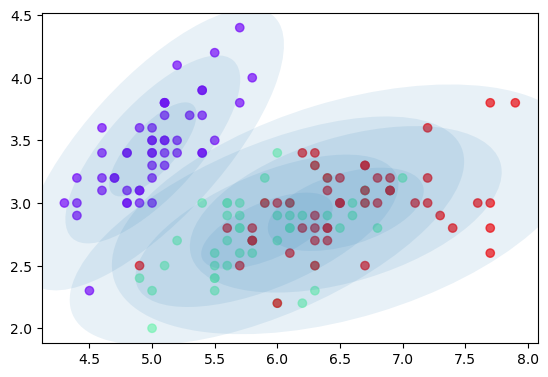

In [9]:
X = iris.data[:,:]
ax = plt.subplot(111, aspect='equal')
plt.scatter(X[:,0], X[:,1], c=iris.target, cmap=plt.cm.rainbow, alpha=0.7)

gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)

for n in np.arange(gmm.n_components): 
    if gmm.covariance_type == 'spherical': cov = np.eye(X.shape[1])*gmm.covariances_[n]
    elif gmm.covariance_type == 'full': cov = gmm.covariances_[n][:2, :2]
    elif gmm.covariance_type == 'tied': cov = gmm.covariances_[:2, :2]
    elif gmm.covariance_type == 'diag': cov = np.diag(gmm.covariances_[n][:2])
    v, w = np.linalg.eigh(cov)
    angle = 180/np.pi * np.arctan2(w[0,1],w[0,0])
    for i in range(1,4):
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,:2], a[0],a[1], angle=angle)
        ell.set_alpha(0.1)
        ax.add_artist(ell)

#### Decision Boundaries

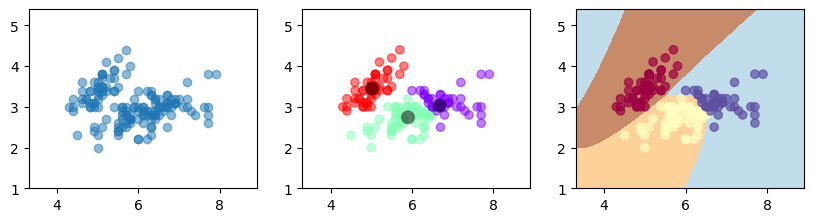

In [13]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)
C = gmm.means_

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
X = iris.data[:,:2] # only 2 features

plt.figure(figsize=(10,4)); 
ax=plt.subplot(131,aspect='equal')
plt.scatter(X[:,0],X[:,1], alpha=0.5);
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

Cpred = gmm.predict(X)

ax=plt.subplot(132,aspect='equal')
plt.scatter(X[:,0],X[:,1],c=Cpred,cmap=plt.cm.rainbow, alpha=0.5);
plt.scatter(C[:,0],C[:,1],c='k',marker='o',s=100,alpha=0.5,edgecolor='none');
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

if True:
    h = .005 # point in the mesh [x_min, m_max]x[y_min, y_max].
    # Plot the decision boundary. For that, we will assign a color to each
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    P = gmm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Put the result into a color plot
    ax=plt.subplot(133,aspect='equal')
    plt.imshow(P, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='equal', origin='lower', alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), alpha=0.7, cmap=plt.cm.Spectral_r)

In [14]:
gmm.score(X)

np.float64(-1.4980073602870045)

### Comparison
- Gaussian Mixture Model Find components with matching distribution
- $k$-means clustering Tends to yield spherical clusters with similar sizes

### Soft Clustering?
- GMM provides quality to each possible cluster membership
- Instead of just in/out, have the likelihoods for all

### More Clustering
- Read and learn about the following algorithms:
    - Agglomerative clustering
    - DBSCAN